In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
df = pd.read_csv("C:\\Users\\Dax\\Downloads\\insurance (1).csv")

In [172]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [173]:
df.shape

(1338, 7)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [175]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [176]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [177]:
df.replace({'sex':{'male':1,'female':0},'smoker':{'no':0,'yes':1},'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

C:\Users\Dax\AppData\Local\Temp\ipykernel_21320\3623960123.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':1,'female':0},'smoker':{'no':0,'yes':1},'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


<Axes: >

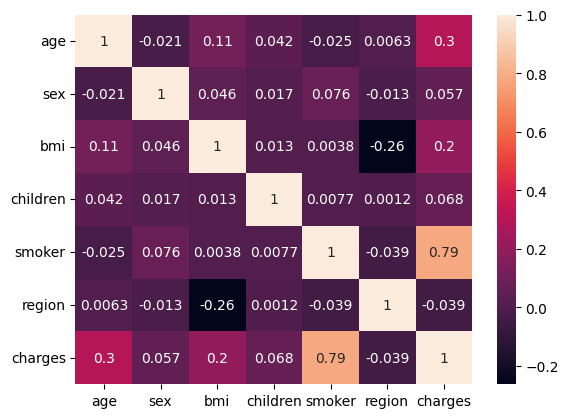

In [179]:
sns.heatmap(df.corr(),annot=True)

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
y=df['charges']
x=df.drop('charges',axis=1)

In [182]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)

In [183]:
from sklearn.linear_model import LinearRegression

In [184]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [185]:
lr.score(x_train,y_train)

0.7418955124411428

In [186]:
lr.score(x_test,y_test)

0.7974660514069132

In [187]:
from sklearn.neighbors import KNeighborsRegressor

In [188]:
knn = KNeighborsRegressor(n_neighbors = 3)

In [189]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [190]:
knn.score(x_train,y_train)

0.5505349793646255

In [191]:
knn.score(x_test,y_test)

0.04138617952350665

In [192]:
from sklearn.ensemble import RandomForestRegressor

In [193]:
rf = RandomForestRegressor(random_state=7)

In [194]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=7)

In [195]:
rf.score(x_train,y_train)

0.9761370869021843

In [196]:
rf.score(x_test,y_test)

0.8547632060346311

In [197]:
from xgboost import XGBRegressor

In [198]:
xgb_model = XGBRegressor(use_label_encoder=False, eval_metric='logloss', random_state=7)
xgb_model.fit(x_train, y_train)

C:\Users\Dax\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:20:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='logloss',
             feature_types=None, feature_weights=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, ...)

In [199]:
xgb_model.score(x_train,y_train)

0.9940681098920383

In [200]:
xgb_model.score(x_test,y_test)

0.8494917696128772

In [201]:
#vif variance inflation factor

In [202]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [203]:
x_const = sm.add_constant(x)

In [204]:
vif = pd.DataFrame()
vif["Feature"] = x_const.columns
vif["VIF"] = [variance_inflation_factor(x_const.values, i) 
              for i in range(x_const.shape[1])]

print(vif)

    Feature        VIF
0     const  39.843665
1       age   1.016405
2       sex   1.008888
3       bmi   1.091118
4  children   1.002254
5    smoker   1.007953
6    region   1.077204
